In [ ]:
!pip install tensorflow
!pip install -q tf-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.7/492.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.2 MB/s eta 0:00:00


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import PIL
from PIL import Image
from urllib import request
from io import BytesIO

***
Data Analysis
***


In [20]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

print("Number of classes:", len(np.unique(y_train)))
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])
print("Image shape:", X_train.shape[1:])

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Split the dataset into 80% training and 20% testing
split_ratio = 0.8
split_idx = int(len(X_train) * split_ratio)
X_train, X_test = X_train[:split_idx], X_train[split_idx:]
y_train, y_test = y_train[:split_idx], y_train[split_idx:]

# Demo of the Splitting
print("Number of classes after splitting:", len(np.unique(y_train)))
print("Number of training samples after splitting:", X_train.shape[0])
print("Number of testing samples after splitting:", X_test.shape[0])
print("Image shape after splitting:", X_train.shape[1:])

Number of classes: 10
Number of training samples: 50000
Number of testing samples: 10000
Image shape: (32, 32, 3)
Number of classes after splitting: 10
Number of training samples after splitting: 40000
Number of testing samples after splitting: 10000
Image shape after splitting: (32, 32, 3)


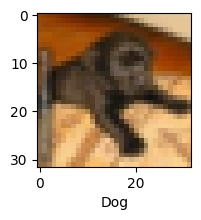

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])
  plt.show()
# Demo of the Function
plot_sample(X_train,y_train,56)

***
CNN(Convolutional Neural Network)
***

In [22]:
num_classes = 10
weight_decay = 1e-4

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

***
Training the model with data augmentation
***

In [23]:
# Data augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

batch_size = 32
epochs = 10
history = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs
)

Epoch 1/10
1250/1250 [==============================] - 124s 95ms/step - loss: 1.5324 - accuracy: 0.4502
Epoch 2/10
1250/1250 [==============================] - 97s 78ms/step - loss: 1.2004 - accuracy: 0.5818
Epoch 3/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.0849 - accuracy: 0.6297
Epoch 4/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.0147 - accuracy: 0.6546
Epoch 5/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.9648 - accuracy: 0.6749
Epoch 6/10
1250/1250 [==============================] - 96s 77ms/step - loss: 0.9258 - accuracy: 0.6884
Epoch 7/10
1250/1250 [==============================] - 97s 77ms/step - loss: 0.8990 - accuracy: 0.6998
Epoch 8/10
1250/1250 [==============================] - 97s 77ms/step - loss: 0.8660 - accuracy: 0.7144
Epoch 9/10
1250/1250 [==============================] - 99s 79ms/step - loss: 0.8342 - accuracy: 0.7250
Epoch 10/10
1250/1250 [==============================] - 96s 77

***
Testing the accuracy of the model
***

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 6s 19ms/step - loss: 0.7768 - accuracy: 0.7552
Test Accuracy: 0.7552000284194946




***
Plotting graph for the training acuracy and training loss
***


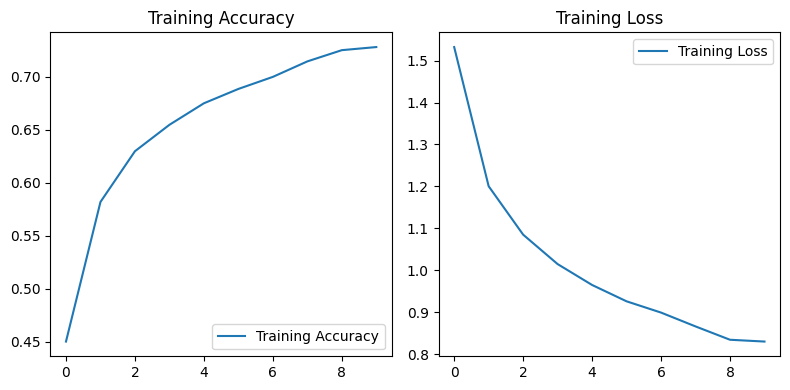

In [25]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.tight_layout()
plt.show()

***
Testing the model
***

In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
classification_rep = classification_report(y_test, y_pred_classes, target_names=classes)
print(classification_rep)

313/313 [==============================] - 7s 23ms/step
              precision    recall  f1-score   support

    Airplane       0.82      0.74      0.78      1014
  Automobile       0.84      0.89      0.86      1014
        Bird       0.71      0.66      0.68       952
         Cat       0.64      0.54      0.58      1016
        Deer       0.83      0.62      0.71       997
         Dog       0.66      0.70      0.68      1025
        Frog       0.69      0.86      0.77       980
       Horse       0.82      0.83      0.82       977
        Ship       0.93      0.79      0.86      1003
       Truck       0.68      0.91      0.78      1022

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



***
SVM MODEL
***


In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train_flatten, y_train)

best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Testing the SVM model
svm_test_accuracy = best_svm_model.score(X_test_flatten, y_test)
print("SVM Test Accuracy:", svm_test_accuracy)


***
3D Visualization of Augmented CIFAR-10 Data
***

In [28]:
X_train = X_train/255.0
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(X_train_flatten)

fig = px.scatter_3d(x=x_train_pca[:, 0], y=x_train_pca[:, 1], z=x_train_pca[:, 2], color=y_train.flatten(),
                    labels={'color': 'Class'}, title='3D Visualization of Augmented CIFAR-10 Data')
fig.show()


***
Comparing the original and augumented image
***

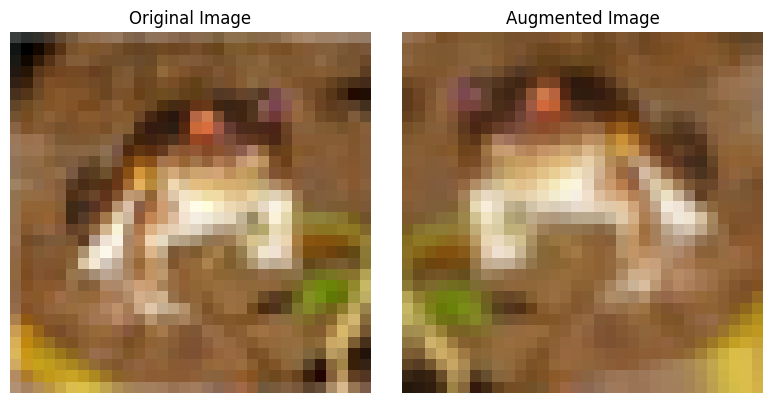

In [27]:
index = 0

original_image = X_train[index]
augmented_image = data_augmentation.random_transform(original_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to Automobile with a 100.00 percent confidence.

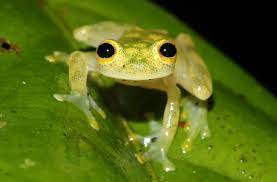

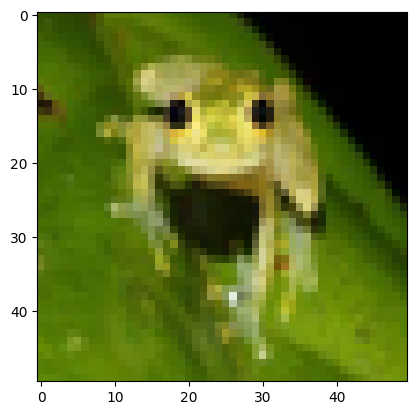

In [29]:
random_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUWFRgWFRYYGBgaGBgYGRgYGBIYGBgYGBgZGRgYGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHzQrJSs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NP/AABEIALYBFQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA1EAABAwIFAgUCBAYDAQAAAAABAAIRAyEEEjFBUQVhBhMicYGRoUKxwdEHFDLh8PEjUnIV/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAKhEAAgICAgECBgEFAAAAAAAAAAECEQMhEjFBBFETFCIyYYFxBRVCkaH/2gAMAwEAAhEDEQA/AMY1krlSnCkGnCEW8rx1IxAJjgjOZGi4Wq0wsGFJw7Tso5EI2HqQiXRcZaotqdWy755UU6SF2m4rlcRpWH807ojaoQy2UNzEqQpKmTAGrjmKEJCI2sQlxYBH0kB1NHbXBTiAhNomiC5iG5sKe+mhPpK1IVERcIRixcLFfIRCxGEa5U2L6aRotE4Ibmzqt8eZxKUqMc+mRqmLTYrAB2ipMTg3N2XdjzRkWnZEXF1JbFHEl1cQAkkkkAJJJJACSSSQAkkkkAJJJJAHoIauZJ2UgBIsELwORgRH0lHyqeWpjqY2VqQyE9iDlhTXMhDcxWpAdw1XYqQRuFDFNSaFTYpSXlFxZKpvlPe5RgC09ldYDpLqgnQFYtUx8W3orJC45krb4fwuxjMzmz7qLVwjGn0t0TSd7K+GzIswD3aBSmdMqjhaZtFsTF1xs8KmhqCMw+i8WITAw8LWvw7XaqJUw7G9pUuOg+GZs00AhX+IYwGPqo2IwTNWOHsUlJITxOtFO5iEWqwNA7rn8oTpCpMz4S9ithDrUQ4XVnVwDwJiyhFq0jOuhO49mbx3TiDIVY5pGq2b6YOqqcd0+bhd2L1F6kWpFAuI1WkWm6EutOyjiSSSYCSSSQAkkkkAJJJJACSSSQB6U2o11gV1zFla/Vn0qvpFhyNVf4fqYqDPlidu68XJ6eUUpLoHjv7STEID5myKHSJlCLrrJWZNU6Y0jlR3OjREqvUdwWkUI4ai6x90xwTVpSGmW7HhwW38M4lmQCRmFivOsNUgq3p1i2HNMLFrizSMqPSqlQxE+kDRVstdos1hutFolzpHup2E6/h3nLnAPBK0j9TNFNMtvI4Q3ZRqQPchZrxN4yZh3eWxud8Sbw0TpLhf4H2VL0r+JNZrx51NrmbimXNIHIDnEH2stXhycbir/dFrj5ZvXvaBmkRyNFTV8S1zpMxtC0TsNQxdHzqBAtmllg5ut2wYPb3WZOE9RbUOQjT0uMz+S45Zea6r3G1R12JpCJafoo9etTefRZGpdPa4wXZRqCQ4j3CnUejsiz4gE2DfpyseUV7hbZXYbDtJ9ZspdTozIDmugczYplSlUz5GnPxIEfVaXB9MZTZnqtzCBEggEm8C+mX7yhuVWmVGm6SMbXoPaDlcS3SdR9VUVMM8HTVTfFX8QjnNPDNaWsMZjmLSRqGtBAidz9FT9N8WZ3htZgBJADmyBJO4JMfBXbDBm4cpL9eSJKEnVmpwHSmBkuEkqDj+ktyktEK4p1osgYjFjQrNpraHwjVGDx3T5lUGIwxaVu8awZraKrxWEDguvD6hx0zmvjoyBXFZYzAluiryIXoRkpK0NOxqSSSoYkkkkAJJJJACSSSQBvKuAa6Q6HDbsiMwrQ0CAI0jVEzprnwvD5z6sn4rGtqE7AHdcqJr3D5TZQ9uyZycnZyey5E2ASI7qX03FeW/MQHDcFUQjnTenZ3hrpaDup2O6C1hhr5VzW6hhnsDmkh8SRGh4BVdS6mybrNTldUdHGKXZVM6TULw1omTE7K9HQmBuVz3lx1ywAPqrPp1VpGcAH91LwjZN272na3KUp26RccaqzJYrwXU/DVOU8i6r3+DYN3kr0xhn0mOR7IVfCiLreE5vpg4xR4f4govbiKgeIOaR3bHpI7QEE12+UGeW0ODy7zPVmIIAyG+XKNdJvqvZK3h+hiB/wA1MPIsHS5rgN/U0gxpaYUzB+B8Ix2cUWA/1Auc4tbP/UEkD4AWn9zhFcWna8JFvC27TVEP+FeBrU8M4va5sh2UEGRLiRaRGpOyvsdhQKmZwkaSRJtOs866c9lbYUgNytFhuREmSCW7i2nuhYot/EOI5jaT8rz8snNub8+C3X+iC+rTAFpmbGLgXMDdQaVNhfmABBFh8m8a3vzKjYms9zoDfTptGx1Hvzsj1azsoysExrBm0g9tgsODXRHL3LCphWAzYGI4Dd5n4R+u4d1TCvayQcoIFobAyuEzxdV+BrSPWDmG83G9wbbiFeMxBDItAJmIIIBu0zoZsrg3Evymj5yxNJ9DzKD6TS55BFRzSXgNJM0ztO+qq6VJz3BrRLiYAHK+iMZ0WjVBa6mxzbnK9rS4X4I+8jQLOY3o1KgXeVSY0kZQWsYDfUZgJ+/1Xpx/qS+1xd/8E8CbtPRXYZjsjJ1DRfmye/C5jKtn4WABwIUamwhxb9Fzpt/sTKPG9PLbjRVFRt1tngEQVneq4LI6RoUk6ezHND/JFNVpAi6pMd07cLRliDUprfHlcXo506MU+mRqmLSYzp4doFRV6BaV6WPLGZopWASSSWpQkkkkAJJJJAHoNoQnyU6ey7BXhLRgC8tODSNAnXCIHHhNtgBlcyIpYZtC5lO9vhCYA+yY5saI4uQO+qlUaAMkX4t+iOVDLDwvWc57mzbLMfIWuDw2AYFt1l/DtINqOItLDp7hXrXFxJ0mAPtvpusZblo68b+ks8MBnvcb3iyG+uwghrwe37KJi6jqdKo8wCGE+xjRZjpXVQGkOAJOhXRCTjFtIbNXhQQ6QeLj3mFcMYHNymY5JJI9t1g6fU6jHhzTDZuCAQex4+FoMN4qYID2Ed2wR8qU4vvQuWzQVH5ZPa5tcfNoUV9B76nmOdLcoYGH+kDNMgGIdpfsuYfrmGeLPjb1Aj81MZi6LrCow7xmaD+aHiT6ZXJjGgtMnSw19IjtEf7SzN3aAS0CwkH8PqkXEuBi2iP5bDoRrNjv8Ijg3kfZJRlFUGmVpZ6ZEyDHPuAffnhOw2JOjhrJ0cDb/ttoR7o+Jr0mj1vY0GwzPa25EQJOuqh1Or4Zl84P/kEz8gXUrF7jv2HYqkHZiQLiO8bQeZ/RU2KY7O2ST6pk6xMxPwEev4lpkHI0u7kQP3VU3GPe/M42izRoFpSSpAk32XLmAhRXYcF6OyqLSLWlEe1syNOFUl9OhLsqMbS1Krq/qaWm/Cu67mkxETzsoD8MCXc7cLJ7VhV6Ms5t4Q3tU3qVPK+9pUVzkkcclToiuaoWJwocFZPahOatoSa2iTJ4zBlpUNa2vQDtVSY3AEXC9DFnUtM0jIrEl0hcXSWJJJJAG/a0908iF1pjdNznY7rwezAIx4DgS0OAIsdD2MJ1WC4lrcomQ2c0Did01gtp8pxPZK/AA78LjidDoiAnhNM8IAYGb6KwwtT0xZRMNhnvdkY2TrE/dTP/AJtRtnMP1TabRUSZgHZao4I1m0zotVSYAbLIUMO/O0Oa4AEX3EcrSUA5wkEz30U8JNG8JJaGeIWk4eoALlu28m68wdUc02lelYvEeh83hptvEbLB1qWYGRE3EiDBEgrpx/THYTYbDdWBZlcU09SaG6rO4lpa5ALitvl4y2T2Wz+rvDvSbcahSKHXRMvYJ/7AAn7qkYU5wWrxRqqKUnE1A67SIjM5vw4H6hPHWWOsHk+5cfzWPKY4qPloFLIzd0sXOjvsE97yVgm1nDRxHyUalj3t0cfqofpn4Zayr2N3h35ZB0KmUKkLH9P644ua10EEgT7rY02WXNkxyg9lqSa0D6Z4j/5DTqtyOmBO/C1OcELzrxVTBax34gYkax7p3h3xK9kMqy5ugduPfla8eUOSM+W6Zv34MuMNEk7TElRq1BzYJFgYJ/sr3omOa9rXMIJAibGLLuMaIMi51+dVzyX0/kpdnn3jFkZHDeVmqWIIK0fi6u0ObSmSCTG4G0rNVKPC2glxpnLl+5k5tYFdcquSFLp4kRdDx10Z0Ee1R6tKbKQ2oHaFPhJNxEZrHdPIuAqtzYW0xDZEQqTG4Cbhd2HPepGikUiSJUpkGCkuu0WbzJPsntpp0O+ENzoMEgLwdswDwIXQ32TLxsnUnkcKWgCZf9LgYPZOznt9PyTHVBuP0U7AJh6j2OD2GHA6/vyFoanX6b2etjmvi8QWk9twFmc9pC6Hq1KSVFRbXRcYfqjTJMg8mDojuxh2Ko6YBJRmVS3XT/NFcczWmVZeYZuf0k6gqv6h08uYSyC9hI/9AcKRhXyJadFEGNcyo/MCASdbH37hdKlGt9DRhcewyZCrwVtutdHzNNVl5N2jvuFkK9DKZW+Oa6GtA2WKLVagkpB61GzjkyE9yY9CENJXAlC6AmBKwFMuqMaNS5o+69Xb01+TOGnLOXNFp91ifAOA8zE5iLMaXfJsP1XqlamwUQA715iYvEG19tlx+oqT/hGsHSMR1DBZ35XaC/ZRq3RLSwQArTqhe2q1o0dM21gqzZRMRsubFKnTZMnvRj8D1GphnjI6CT/Ts73CueoeN35CBTAfGsyPopeJ6Gx7wRrzwqjrXQC1riDMBdE4pNWCkYyjjHVKpe9xc5xuf2V0adlXdLwBzZnCArlzFOeceVIxltkB9JR301aPYQgPYCojMkgUfSVZU3yolSkhteWlXJctg3ZYOagOYu08RyjGIWe4iKutggTMLqnEJLRZZDsuajmk+kEC2vEINRgOwP0U7FNptBEeraNlCzADUrlHJUNzRtp7JwqA/wB0wuCWYJUSPkcrjyI1TZSbrsgAJsUbzO2nsugSSIiN0jTgcfqm2hoe1wA907zQgxI7G/Gqe22o2i6TSLJeCxGVwI0OqndUwhe3O0iWi/JaqQiDIK1PSntfTIkFwsWnWOR2ScnFa2iopPRnsB1DIcrj6Dr27hUPVabfMflu2fhW/VMOGPdAtx2VbXZHsVtiaT5LyKTa0ypbhpKDicG5t4srFrIKucGGPY5jgJ/CV1PM47KWzHAFNcy611PptN1ogjVO/wDgU+Uvm4LsnlRQ4WiHCwQcThyHaLa9G6TTa+4lX+O6PSfcMAPMJxycrlEHKyp/hvgy1tVxFyWgfAn9VtOpYazWiD6QXe5vzblQvDuByDJpLtY29lY9UxAzuy+rawiCAFhklcXJ9msfBm8Y5v8AMNzD+lgv7lTWPaXGDIWS61VqOrPc0kCQ2R2C0fRsO5rBmBM2zRaVyqKjJSNJQbjdqiexsXUDqZJYZ4KtqkBt9dlBrMLwQBtddWRt6Ofoy2QREKO0gzE2Uw7hDqEN1XIn4IIrZPEfdDqYe6neVIkILgmpb0JldUZdR6tGdFZOpTdDfhzst4zEVbmLtOsRZSHsUapTWyafYEjzElCBIXUcEPRoS+2yY5q6WHaE5i5GxAi0pmikxdMc0ITENYQZuQPbdcDDGpt9k8MGy4BGqdgdZI3RHPgc76JrBZOJI0U+RjG4kRLdCLgzzcGfZDZU1k2/JNLJM3/unZdBfVaUi0Ea2RISY8tu0kX1BNvYplfDOaczSY/fYjhMD590q9h9DMVi3vdLjcCNudVHfWkQeZR3sB01Uao2NdPyWkaZLZxjQR32RML6XB3fRApgZoJI77/PKscDhy5xYRJ2I0/2rkVEtnYBzoewQfxBcfTe3+oEfCs8L1mn5YYGHzG/1PLrO2gN+i5T6hnOUx7EBc6g5S4t/wAFziqtETCE5pgrQYcvdrZXvWcNQo0HZGgVcoyi9zzHGqxvRHVyS6s51/w2gewGy7Y4ViVNmaRscBQa4hhIbY35MaKq6jUyNc6YAC6yvdVfW8TmAZyZPwuTPJNGylSKmjpJFyZ+SZV7gMa5wy7TptPKpqbSbK8wlNjGOmc+3HdciklK2RG2dx9cNvwPui4PDk0y/MBoIm5ngKjxFQuN9Am1Ma8ta0QA2RIsT7laxyLbZLlTBY+nDyANUAt2KKRJkmSmPYs29ksBXzWhNcCY2RmMO664J8vAESpTIQnhTXRCCWCFSkJohupTqotWmArBzU1zBFwtYzoRVGkuKd5PZJa/EAmli61i44FKVzCGupXlJ9MbmE4glP8A5dwEkGOU7YwTmd1wNhPKbqhCHlu+6Iyna6bTKO1JloryPUY07rriQQeCjus7SPyTKzJ0+6tMSYV1SdVW4obgKe+mQJtPZR8Q6U40nofIjtf9du6fka4d4+UJ9O077hcaTt9Z+y1q9oAXkkH9uOVLoktkg6iDGh/ui0Tm1EEb/wCfknU6UbW+yd32MA1xDpUuvUbmbBMxNp0HdBY5ocMwzNBuO24V7/KMLWObZjhI312KidRaZcU5E6nj313ML4ysY1ogQIbp8qY57PwqqfUEDQRayNSqjRq2i9VdktUXGLpBjWmQczZtt291nKr8ziT/AIFb4zM6iANRKoWVRvbsVzeojT0Ddlj0sA1Gtg+qwgSZ2gKzx9UAZSA0tkG0OP8A67qgZVggtJkGxBuI3CO6vnJc5xcTqSSSfclcsoJr8jUnHQN4BuAmmiSEVq7ZKyeyMaADiWucWwLOix3iNk/LKc+0AIrRCJSvYEV7ENgcczdPj9VLIk9k1zonshNoERBRDUGsQ2J3SGJDnEG97bIznAC4kStaaewojBgGi46ApL2bppFkciQJASXcspIsQd1IFBNOEvNyjcroqykk0AWhQzbwrF1ZoaGu2t7qpCeZKdjTodichPpFlHyXRcqeGhHIADRdHYJQyxObISsaHFgO6E6mfdGDxxdcKu2FI4UCtTCI6oQhvZN5SQEZ7foodSmRopxamOaCO62hKiQOHq2h0f5yrIP2Bnf9lTupkO0UrDVAYnUae3C0f4KTDFjQT3RaXUXMYWRmadAfwnsmvIQKzZ/RTfJUxqVPQUFzmySZ+3spmHxBAEH6qDhasWMfKkFkGPkLOVrQ3tWaTpVYvExfe0qL1bA/iAg6nhD6R1Z+HeHtAOvpOlwRMpY7rlWrmzFgzaw0DX8k7Tjt7FaorMqGK7mmyeG2hMLo1WRNklvUBEH+yNTxTeVW1Q22WZi8xr2jZRzKOCYWaFtQdknVNlSsxDm31UlmNB7FS8dDssaYSrNnVBoVpRXtB+LrOnYwVegHOzO1gDbawXMgKOacwQSbHMCBDb2IO6HnAMCCVUuXl2BHdm0gQmsBUiq+8IeQ7ovQUCLeySI5qSdiBZFxzAkkmQNhNDiEkkwHioiNMpJKWNCITYSSSGMIhJzpXElaAFUK5TOySSrwIdUCG8Ajv9kkk4gRXm6a4QZGqSS2QEqlcfdLUApJKSgVVoO3HzM/srDEU/SDOkaWNrpJJS8FIeauaANAN4/RDISSWT7JYjZDcZSSQhDKjeEMCdUkla6B9CPCblSSQSNpPLTYlTG408JJJtWUTW1iRPKkOdmykgSBlBAAMa3I11SSWL0UNpUxPcD/AD5XTZdSWcuwYJJJJMR//9k="

res = request.urlopen(random_url).read()
Sample_Image = Image.open(BytesIO(res)).resize((50,50))

plt.imshow(Sample_Image)

random_path = tf.keras.utils.get_file('avgd',origin = random_url)

img = keras.preprocessing.image.load_img(
    random_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array (img)
img_array = tf.expand_dims (img_array, 0) # Create a batch

predictions = model.predict (img_array)
score = tf.nn.softmax(predictions [0])

print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format (classes [np.argmax(score)], 100 * np.max(score))
)